#Εργασία 2
###Ερώτημα 1
1. Συνάρτηση loadImages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

Mounted at /content/gdrive


In [ ]:
def preprocess(img) :
  img = img.flatten()
  mean = img.mean()
  std = img.std()
  img = img-mean
  img = img/std
  return img

def loadImages(path, set_number):
  images = []
  labels = []

  if(set_number == "Set_1"):
      start = 1
      stop = 7
  elif (set_number == "Set_2"):
      start = 8
      stop = 19
  elif (set_number == "Set_3"):
      start = 20
      stop = 31
  elif (set_number == "Set_4"):
      start = 32
      stop = 45
  elif (set_number == "Set_5"):
      start = 46
      stop = 64

  for name in os.listdir(path) :
    if (int(name[9] + name[10]) < start or int(name[9] + name[10]) > stop) :
      continue
    img = Image.open(os.path.join(path, name))
    img = img.resize((50,50))
    img = np.asarray(img)
    img = img.reshape(1,-1)
    img = preprocess(img)
    images.append(img)
    labels.append(int(name[6] + name[7]))

  images = np.asarray(images)
  return images, labels

path = '/content/gdrive/MyDrive/ML/faces'


2. Eigenfaces

In [ ]:
from sklearn.metrics import accuracy_score

def euclideanDistance(vector1, vector2):
  distance = 0.0
  length=len(vector1)
  for i in range(length):  ## here i loop for all the dims of vector1 eg if vector1 has 1 element then one loop else if 2 elements two loops.
    distance += np.square(vector1[i] - vector2[i])
  return np.sqrt(distance)

def findNearest(test,X,labels):
  firstLoop=True
  count = 0;
  for aRow in X:  ## Για κάθε στοιχείο του training set
    distance = euclideanDistance(test, aRow) ##Βρες την αποσταση από την παρατήρηση.
    if not firstLoop:
      if distance<minDist:
        nearest=labels[count]
        minDist=distance ## κράτα το στοιχείο του training set με την μικρότερη απόσταση.
    else:
      minDist=distance
      nearest=labels[count]
      firstLoop=False
    count += 1
  return nearest

def scoreKNN(test_set, test_labels, train_set, train_labels) :
  prediction = []
  count = 0;
  score = 0;
  for aRow in test_set :
    prediction.append(findNearest(aRow, train_set, train_labels))

  return accuracy_score(test_labels, prediction) * 100


def Eigenfaces(d, path) :
  images1, labels1 = loadImages(path, "Set_1")
  images2, labels2 = loadImages(path, "Set_2")
  images3, labels3 = loadImages(path, "Set_3")
  images4, labels4 = loadImages(path, "Set_4")
  images5, labels5 = loadImages(path, "Set_5")

  pca = PCA(n_components=d).fit(images1)
  images1 = pca.transform(images1)
  images2 = pca.transform(images2)
  images3 = pca.transform(images3)
  images4 = pca.transform(images4)
  images5 = pca.transform(images5)

  print("Calculating accuracy for d =",d)

  score1 = scoreKNN(images1, labels1, images1, labels1)
  print("accuracy for Set_1", score1, "%")

  score2 = scoreKNN(images2, labels2, images1, labels1)
  print("accuracy for Set_2", score2, "%")

  score3 = scoreKNN(images3, labels3, images1, labels1)
  print("accuracy for Set_3", score3, "%")

  score4 = scoreKNN(images4, labels4, images1, labels1)
  print("accuracy for Set_4", score4, "%")

  score5 = scoreKNN(images5, labels5, images1, labels1)
  print("accuracy for Set_5", score5, "%")

  print("\n");

Eigenfaces(9, path)
Eigenfaces(30,path)

(70, 2500)
Calculating accuracy for d = 9
accuracy for Set_1 100.0 %
accuracy for Set_2 100.0 %
accuracy for Set_3 77.5 %
accuracy for Set_4 33.57142857142857 %
accuracy for Set_5 14.210526315789473 %


(70, 2500)
Calculating accuracy for d = 30
accuracy for Set_1 100.0 %
accuracy for Set_2 100.0 %
accuracy for Set_3 95.83333333333334 %
accuracy for Set_4 43.57142857142857 %
accuracy for Set_5 22.105263157894736 %




####**Σχόλια**
Βλέπουμε ότι στα 3 πρώτα set έχουμε πολύ καλό accuracy ακόμα και για d=9 για αυτό και φαίνεται οτι είναι καλή η γενίκευση της μεθόδου για αυτά τα set, ενώ στα 2 τελευταία όπου οι φωτογραφίες είναι αρκετά σκοτεινές έχουμε κάτω από 50% accuracy ακόμα και για d=30 άρα έχουμε κακή γενίκευση για αυτά τα set.   

3. Απεικόνιση των πρώτων 9 κύριων ιδιοδιανύσματα

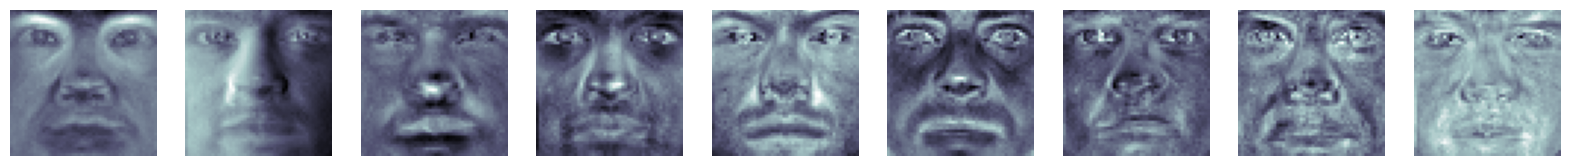

In [ ]:
images1, labels1 = loadImages(path, "Set_1")
pca = PCA(n_components=9).fit(images1)
plt.figure(figsize=(20, 20))

plt1 = plt.subplot(191)
plt1.axis('off')
plt2 = plt.subplot(192)
plt2.axis('off')
plt3 = plt.subplot(193)
plt3.axis('off')
plt4 = plt.subplot(194)
plt4.axis('off')
plt5 = plt.subplot(195)
plt5.axis('off')
plt6 = plt.subplot(196)
plt6.axis('off')
plt7 = plt.subplot(197)
plt7.axis('off')
plt8 = plt.subplot(198)
plt8.axis('off')
plt9 = plt.subplot(199)
plt9.axis('off')

plt1.imshow(pca.components_[0].reshape(50, 50), cmap='bone')
plt2.imshow(pca.components_[1].reshape(50, 50), cmap='bone')
plt3.imshow(pca.components_[2].reshape(50, 50), cmap='bone')
plt4.imshow(pca.components_[3].reshape(50, 50), cmap='bone')
plt5.imshow(pca.components_[4].reshape(50, 50), cmap='bone')
plt6.imshow(pca.components_[5].reshape(50, 50), cmap='bone')
plt7.imshow(pca.components_[6].reshape(50, 50), cmap='bone')
plt8.imshow(pca.components_[7].reshape(50, 50), cmap='bone')
plt9.imshow(pca.components_[8].reshape(50, 50), cmap='bone')

####**Σχόλια**
Όπως ξέρουμε από την θεωρία τα ιδιοδιανύσματα που επιστρέφει η PCA είναι ορθογώνια μεταξύ τους και περιγράφουν τα κύρια στοιχεία των δεδομένων όπου περιέχουν την μεγαλύτερη διακύμανση μεταξύ των δεδομένων. Άρα θα έλεγε κανείς οτι περιγράφουν τα διαφορετικά χαρακτηριστηκά των 10 ανθρώπων όπως μάτια, η μύτη και τα χείλια. Επίσης βλέπουμε να περιγράφουν και την φωτεινότητα των εικόνων.

4. Ποιότητα ανακατασκευής για d=9 και d=30

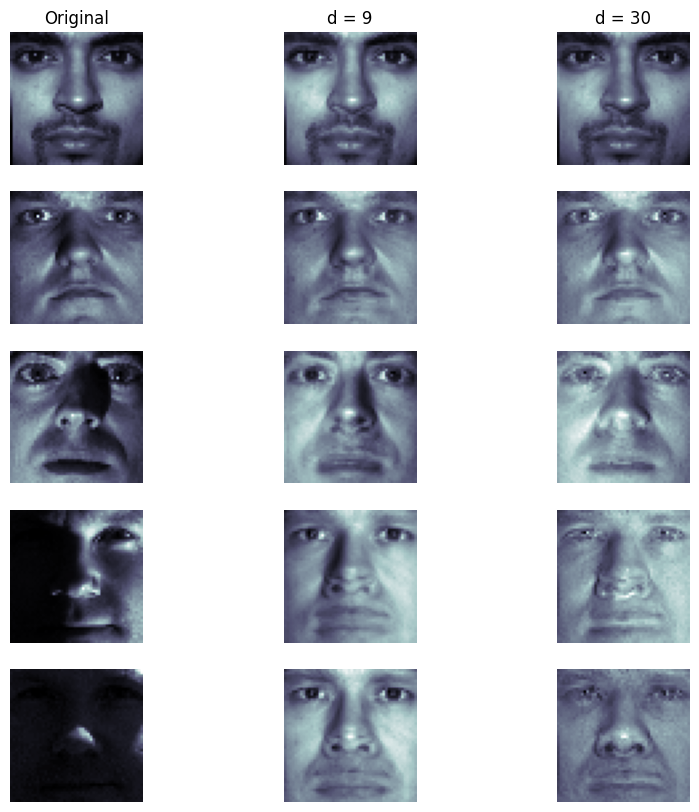

In [ ]:
import random

images1, labels1 = loadImages(path, "Set_1")
images2, labels2 = loadImages(path, "Set_2")
images3, labels3 = loadImages(path, "Set_3")
images4, labels4 = loadImages(path, "Set_4")
images5, labels5 = loadImages(path, "Set_5")

rand1 = random.randint(0, images1.shape[0])
rand2 = random.randint(0, images2.shape[0])
rand3 = random.randint(0, images3.shape[0])
rand4 = random.randint(0, images4.shape[0])
rand5 = random.randint(0, images5.shape[0])

pca = PCA(n_components=9).fit(images1)

transformImage1 = pca.transform(images1)
reconstractImage1 = pca.inverse_transform(transformImage1)
transformImage2 = pca.transform(images2)
reconstractImage2 = pca.inverse_transform(transformImage2)
transformImage3 = pca.transform(images3)
reconstractImage3 = pca.inverse_transform(transformImage3)
transformImage4 = pca.transform(images4)
reconstractImage4 = pca.inverse_transform(transformImage4)
transformImage5 = pca.transform(images5)
reconstractImage5 = pca.inverse_transform(transformImage5)

pca1 = PCA(n_components=30).fit(images1)

transformImage1_ = pca1.transform(images1)
transformImage2_ = pca1.transform(images2)
transformImage3_ = pca1.transform(images3)
transformImage4_ = pca1.transform(images4)
transformImage5_ = pca1.transform(images5)

reconstractImage1_ = pca1.inverse_transform(transformImage1_)
reconstractImage2_ = pca1.inverse_transform(transformImage2_)
reconstractImage3_ = pca1.inverse_transform(transformImage3_)
reconstractImage4_ = pca1.inverse_transform(transformImage4_)
reconstractImage5_ = pca1.inverse_transform(transformImage5_)

fig = plt.figure(figsize=(10, 10))
plt1 = fig.add_subplot(531)
plt1.axis('off')
plt2 = fig.add_subplot(532)
plt2.axis('off')
plt3 = fig.add_subplot(533)
plt3.axis('off')
plt4 = fig.add_subplot(534)
plt4.axis('off')
plt5 = fig.add_subplot(535)
plt5.axis('off')
plt6 = fig.add_subplot(536)
plt6.axis('off')
plt7 = fig.add_subplot(537)
plt7.axis('off')
plt8 = fig.add_subplot(538)
plt8.axis('off')
plt9 = fig.add_subplot(539)
plt9.axis('off')
plt10 = fig.add_subplot(5,3,10)
plt10.axis('off')
plt11 = fig.add_subplot(5,3,11)
plt11.axis('off')
plt12 = fig.add_subplot(5,3,12)
plt12.axis('off')
plt13 = fig.add_subplot(5,3,13)
plt13.axis('off')
plt14 = fig.add_subplot(5,3,14)
plt14.axis('off')
plt15 = fig.add_subplot(5,3,15)
plt15.axis('off')

plt1.imshow(images1[rand1].reshape(50, 50), cmap='bone')
plt1.set_title('Original')
plt4.imshow(images2[rand2].reshape(50, 50), cmap='bone')
plt7.imshow(images3[rand3].reshape(50, 50), cmap='bone')
plt10.imshow(images4[rand4].reshape(50, 50), cmap='bone')
plt13.imshow(images5[rand5].reshape(50, 50), cmap='bone')

plt2.imshow(reconstractImage1[rand1].reshape(50, 50), cmap='bone')
plt2.set_title('d = 9')
plt5.imshow(reconstractImage2[rand2].reshape(50, 50), cmap='bone')
plt8.imshow(reconstractImage3[rand3].reshape(50, 50), cmap='bone')
plt11.imshow(reconstractImage4[rand4].reshape(50, 50), cmap='bone')
plt14.imshow(reconstractImage5[rand5].reshape(50, 50), cmap='bone')

plt3.imshow(reconstractImage1_[rand1].reshape(50, 50), cmap='bone')
plt3.set_title('d = 30')
plt6.imshow(reconstractImage2_[rand2].reshape(50, 50), cmap='bone')
plt9.imshow(reconstractImage3_[rand3].reshape(50, 50), cmap='bone')
plt12.imshow(reconstractImage4_[rand4].reshape(50, 50), cmap='bone')
plt15.imshow(reconstractImage5_[rand5].reshape(50, 50), cmap='bone')



####**Σχόλια**
Βλέπω ότι για μεγαλύτερο d έχω καλύτερη ανακατασκευή εικόνας όπως και περιμέναμε, ενώ όσο πιο φωτεινή είναι η αρχική εικόνα τόσο πιο ακριβής είναι η ανακατασκευή της. Για σκοτεινές εικόνες η ανακατεσκευή είναι αρκετά θολή στα μαύρα σημεία της αρχικής εικόνας, καθώς εκεί υπάρχει πολύ πληροφορία που χάνεται.  

5. Απεικόνιση των 9 κύριων singular vectors

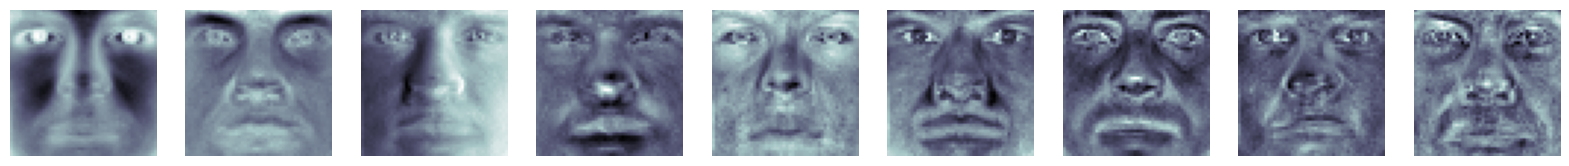

In [ ]:
images1, labels1 = loadImages(path, "Set_1")
U, S, V = np.linalg.svd(images1)
plt.figure(figsize=(20, 20))

plt1 = plt.subplot(191)
plt1.axis('off')
plt2 = plt.subplot(192)
plt2.axis('off')
plt3 = plt.subplot(193)
plt3.axis('off')
plt4 = plt.subplot(194)
plt4.axis('off')
plt5 = plt.subplot(195)
plt5.axis('off')
plt6 = plt.subplot(196)
plt6.axis('off')
plt7 = plt.subplot(197)
plt7.axis('off')
plt8 = plt.subplot(198)
plt8.axis('off')
plt9 = plt.subplot(199)
plt9.axis('off')

plt1.imshow(V[0].reshape(50, 50), cmap='bone')
plt2.imshow(V[1].reshape(50, 50), cmap='bone')
plt3.imshow(V[2].reshape(50, 50), cmap='bone')
plt4.imshow(V[3].reshape(50, 50), cmap='bone')
plt5.imshow(V[4].reshape(50, 50), cmap='bone')
plt6.imshow(V[5].reshape(50, 50), cmap='bone')
plt7.imshow(V[6].reshape(50, 50), cmap='bone')
plt8.imshow(V[7].reshape(50, 50), cmap='bone')
plt9.imshow(V[8].reshape(50, 50), cmap='bone')

####**Σχόλια**
Τα singular vectors της SVD μοιάζουν αρκετάμε τα eigenvectors του PCA που βρήκα αλλά δεν παύουν να είναι διαφορετικές εικόνες. Αυτό σημβαίνει γιατί υπάρχει η σχέση ανάμεσα στις ιδιοτιμές Λ του πίκανα συσχέτισης C και τις ιδιάζουσες τιμές Σ του πίνακα Χ των δεδομένων $ Λ = \frac{Σ^{2}}{n-1}$ όπου n το πλήθος των δεδομένων.

###Ερώτημα 2


In [ ]:
from keras.datasets import mnist
import numpy as np
from numpy import exp, shape
from sklearn import svm
from sklearn.metrics import accuracy_score

(train_X, train_y), (test_X, test_y) = mnist.load_data()
validation_X = train_X[-10000:]
validation_y = train_y[-10000:]

def sigmoid(z):
    sig = 1/(1+exp(-z))
    return sig

def normalize(set) :
  images = []

  for img in set :
    img = img.reshape(1,-1)
    img = sigmoid(img[0])
    img = img.flatten()
    images.append(img)
  return np.asarray(images)

train_X = normalize(train_X)
test_X = normalize(test_X)
validation_X = normalize(validation_X)


<ipython-input-25-9f5db1f0feec>:12: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+exp(-z))


In [ ]:
i = 0.1
count = 0

while (i <= 1.0) :
  clf = svm.SVC(C=i, kernel='linear')
  clf.shape_fit_ = validation_X.shape
  clf.fit(validation_X, validation_y)

  score_test = clf.score(test_X, test_y)
  score_train = clf.score(validation_X, validation_y)

  count += 1
  if count == 1 :
    best_score = score_test + score_train
    best_c = i
  else :
    if best_score < score_test + score_train :
      best_score = score_test + score_train
      best_c = i

  print("Validation set score for linear and c=",i,":", score_train * 100 , "%")
  print("Test set score for linear and c=",i,":", score_test * 100, "%")
  i += 0.1

Validation set score for linear and c= 0.1 : 96.61999999999999 %
Test set score for linear and c= 0.1 : 92.47 %
Validation set score for linear and c= 0.2 : 97.77 %
Test set score for linear and c= 0.2 : 92.30000000000001 %
Validation set score for linear and c= 0.30000000000000004 : 98.3 %
Test set score for linear and c= 0.30000000000000004 : 91.84 %
Validation set score for linear and c= 0.4 : 98.63 %
Test set score for linear and c= 0.4 : 91.53999999999999 %
Validation set score for linear and c= 0.5 : 98.82 %
Test set score for linear and c= 0.5 : 91.31 %
Validation set score for linear and c= 0.6 : 99.03999999999999 %
Test set score for linear and c= 0.6 : 91.21000000000001 %
Validation set score for linear and c= 0.7 : 99.21 %
Test set score for linear and c= 0.7 : 90.92 %
Validation set score for linear and c= 0.7999999999999999 : 99.38 %
Test set score for linear and c= 0.7999999999999999 : 90.88000000000001 %
Validation set score for linear and c= 0.8999999999999999 : 99.4600

In [ ]:
i = 5.0
best_gamma = 0

while (i <= 10.0) :
  j = 0.05

  while (j <=0.1) :
    clf = svm.SVC(C=i, kernel='rbf', gamma=j)
    clf.shape_fit_ = validation_X.shape
    clf.fit(validation_X, validation_y)

    score_test = clf.score(test_X, test_y)
    score_train = clf.score(validation_X, validation_y)

    if best_score < score_test + score_train :
      best_score = score_test + score_train
      best_c = i
      best_gamma = j

    print("Validation set score for rbf, c=",i,"and gamma", j, ":", score_train * 100 , "%")
    print("Test set score for rbf, c=",i,"and gamma", j, ":", score_test * 100, "%")
    j += 0.05

  i += 5.0

print("---------------\n")
if best_gamma != 0 :
  print("\nBest svm is rbf with c=", best_c, "and gamma=", best_gamma, "with score", (best_score / 2) * 100, "%")
else :
  print("\nBest svm is linear with c=", best_c, "with score", (best_score / 2) * 100, "%")

Validation set score for rbf, c= 5.0 and gamma 0.05 : 100.0 %
Test set score for rbf, c= 5.0 and gamma 0.05 : 95.97 %
Validation set score for rbf, c= 5.0 and gamma 0.1 : 100.0 %
Test set score for rbf, c= 5.0 and gamma 0.1 : 96.1 %
Validation set score for rbf, c= 10.0 and gamma 0.05 : 100.0 %
Test set score for rbf, c= 10.0 and gamma 0.05 : 96.05 %
Validation set score for rbf, c= 10.0 and gamma 0.1 : 100.0 %
Test set score for rbf, c= 10.0 and gamma 0.1 : 96.1 %
---------------


Best svm is rbf with c= 5.0 and gamma= 0.1 with score 98.05 %


####**Σχόλια**
Εδώ δεν χρησημοποιώ τα 60.000 δεδομένα εκπαίδευσης καθώς για να εκπαιδεύσω το μοντέλο σε τόσο πολλά δεδομένα μεγάλης δίαστασης (60.000,784) χρειάζεται πάρα πολύ ώρα. Επίσης δεν χρησημοποιώ ούτε cross validation καθώς και να τα χωρίσω σε μικρότερα πακέτα και να εκπαιδευτεί σε όλα τα πακέτα θέλει πάλι πολύ ώρα. Οπότε χρησημοποιώ ένα validation set και βρίσκω για αυτό και το test set τις καλύτερες υπερπαραμέτρους.

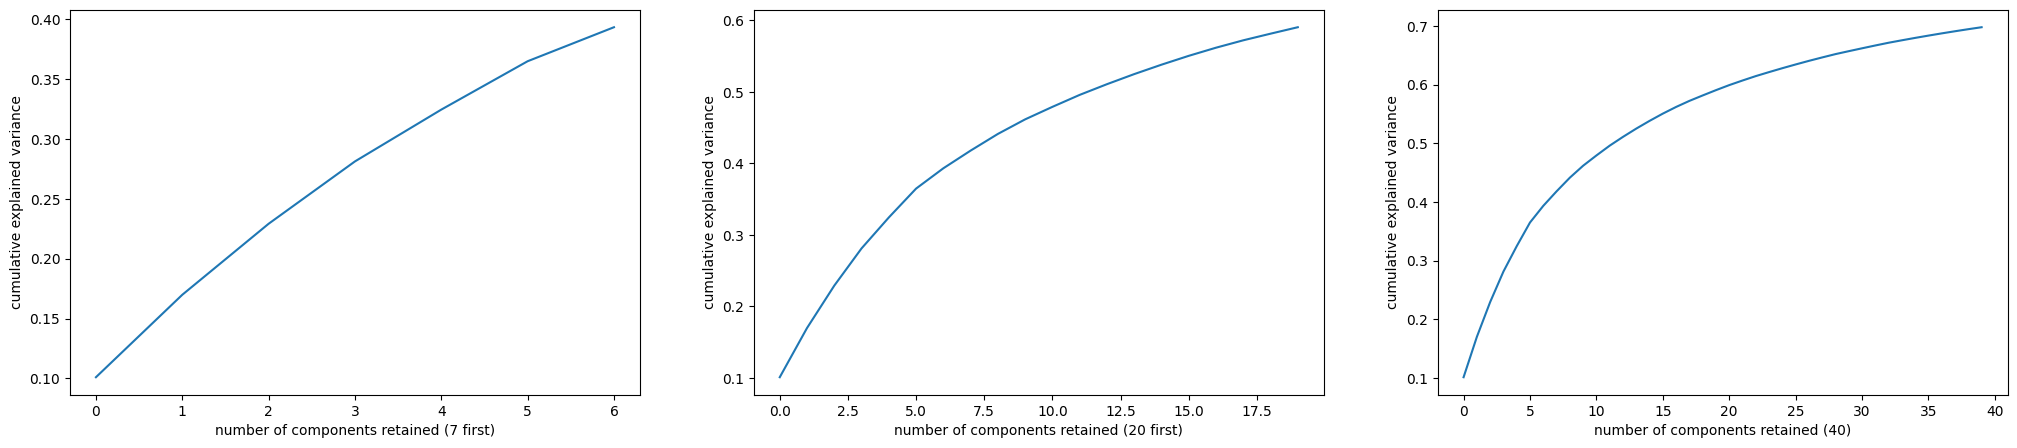

In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(25, 5))
pca = PCA(n_components=40).fit(train_X)
cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.subplot(1, 3, 1)
plt.plot(cumExplainedVar[:7])
plt.xlabel('number of components retained (7 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(1, 3, 2)
plt.plot(cumExplainedVar[:20])
plt.xlabel('number of components retained (20 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(1, 3, 3)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (40)')
plt.ylabel('cumulative explained variance');

In [ ]:
import time

for i in [7,20,40] :
  pca = PCA(n_components=i).fit(train_X)
  tr_X = pca.transform(train_X)
  testX = pca.transform(test_X)

  clf = svm.SVC(C=5.0, kernel='rbf', gamma=0.1)
  clf.shape_fit_ = tr_X.shape

  start = time.time()
  clf.fit(tr_X, train_y)
  score = clf.score(testX, test_y)
  end = time.time()

  print(i,"Components score:", score * 100 , "% with time=", end - start, "sec")

7 Components score: 87.91 % with time= 41.7103853225708 sec
20 Components score: 97.48 % with time= 24.036571979522705 sec
40 Components score: 98.13 % with time= 36.86920118331909 sec


####**Σχόλια**
Βλέπουμε οτι όσο λιγότερα components κρατάμε τόσο λιγότερο χρόνο κρατάει το fit και predict για τα δεδομένα αλλά έχουμε και λιγότερη ακρίβεια, ενώ όσο περισσότερα components κρατάμε τόσο περισσότερο χρόνο κρατάει το fit και predict για τα δεδομένα αλλά έχουμε και μεγαλύτερη ακρίβεια.
Για την πρώτη επανάληψη έχουμε παραπάνω χρόνο καθώς υπολογίζει το kernel cache που χρησημοποιείται στις άλλες δύο.